In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

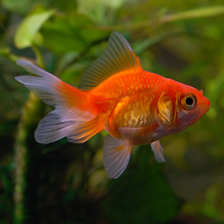

In [3]:
gold_fish=Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [4]:
gold_fish=np.array(gold_fish)/255.0
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [5]:
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [7]:
result=classifier.predict(gold_fish[np.newaxis,...])
result.shape

1/1 [==============================] - 7s 7s/step


(1, 1001)

In [8]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [9]:
image_labels=[]
with open('ImageNetLabels.txt', 'r') as f:
    image_labels=f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'goldfish'

In [11]:
dataset_url="http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)
data_dir

'.\\datasets\\flower_photos'

In [12]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [13]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [14]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [15]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

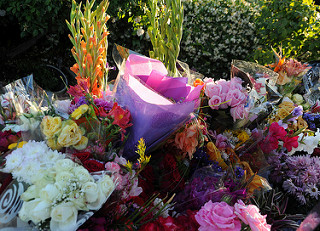

In [16]:
Image.open(str(roses[3]))

In [17]:
flower_images_dict= {
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [18]:
flower_names_labels={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}

In [19]:
str(flower_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [20]:
img=cv2.imread(str(flower_images_dict['daisy'][0]))

In [21]:
img.shape

(263, 320, 3)

In [22]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [23]:
X, y=[], []

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flower_names_labels[flower_name])

In [24]:
X=np.array(X)
y=np.array(y)

In [25]:
X=X/255.0

In [26]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

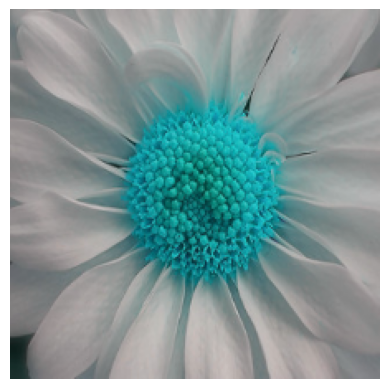

In [27]:
plt.axis('off')
plt.imshow(X[0])

In [28]:
predicted=classifier.predict(np.array([X[1], X[2], X[3]]))
predicted=np.argmax(predicted, axis=1)
image_labels[986]

1/1 [==============================] - 1s 797ms/step


'daisy'

In [29]:
feature_vector_model="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5"
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_vector_model, input_shape=(224, 224, 3), trainable=False
)

In [30]:
num_of_flowers=5
model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1664)              3766048   
                                                                 
 dense (Dense)               (None, 5)                 8325      
                                                                 
Total params: 3,774,373
Trainable params: 8,325
Non-trainable params: 3,766,048
_________________________________________________________________


In [35]:
with tf.device('/CPU:0'):
    model.fit(X_train, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 65s 705ms/step - loss: 0.1550 - acc: 0.9544
Epoch 2/5
92/92 [==============================] - 64s 698ms/step - loss: 0.1287 - acc: 0.9745
Epoch 3/5
92/92 [==============================] - 65s 703ms/step - loss: 0.1126 - acc: 0.9758
Epoch 4/5
92/92 [==============================] - 68s 742ms/step - loss: 0.0985 - acc: 0.9833
Epoch 5/5
92/92 [==============================] - 70s 761ms/step - loss: 0.0863 - acc: 0.9888


In [36]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 2s 92ms/step - loss: 0.3149 - acc: 0.9114


[0.3148580491542816, 0.9114441275596619]